In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [21]:
df = pd.read_csv("../data_splits/train-data-split.csv")

#### Considering just issues and sub-issues

In [4]:
issues_df = df[['Consumer complaint narrative','Issue','Sub-issue']]
issues_df.head()

Consumer complaint narrative  \
0  The credit bureaus keep disrespecting the laws...   
1  I sent in a complaint in XXXX of 2021 about so...   
2  I ordered a copy of my report and I found out ...   
3  It appears that my credit file has been compro...   
4  I have never authorized, consented to nor bene...   

                                               Issue  \
0  Problem with a company's investigation into an...   
1               Incorrect information on your report   
2  Problem with a credit reporting company's inve...   
3               Incorrect information on your report   
4               Incorrect information on your report   

                                           Sub-issue  
0  Their investigation did not fix an error on yo...  
1                Information belongs to someone else  
2  Their investigation did not fix an error on yo...  
3                Information belongs to someone else  
4                Information belongs to someone else

In [6]:
issues_df['Issue'].value_counts()

Issue
Incorrect information on your report                                                65393
Improper use of your report                                                         46434
Problem with a credit reporting company's investigation into an existing problem    33849
Problem with a company's investigation into an existing problem                     15868
Managing an account                                                                  5541
Attempts to collect debt not owed                                                    4072
Problem with a purchase shown on your statement                                      2412
Written notification about debt                                                      1826
Closing an account                                                                   1454
Problem with a lender or other company charging your account                         1014
Dealing with your lender or servicer                                                  979
Unab

#### Exploring ungrouped sub-issues within an issue

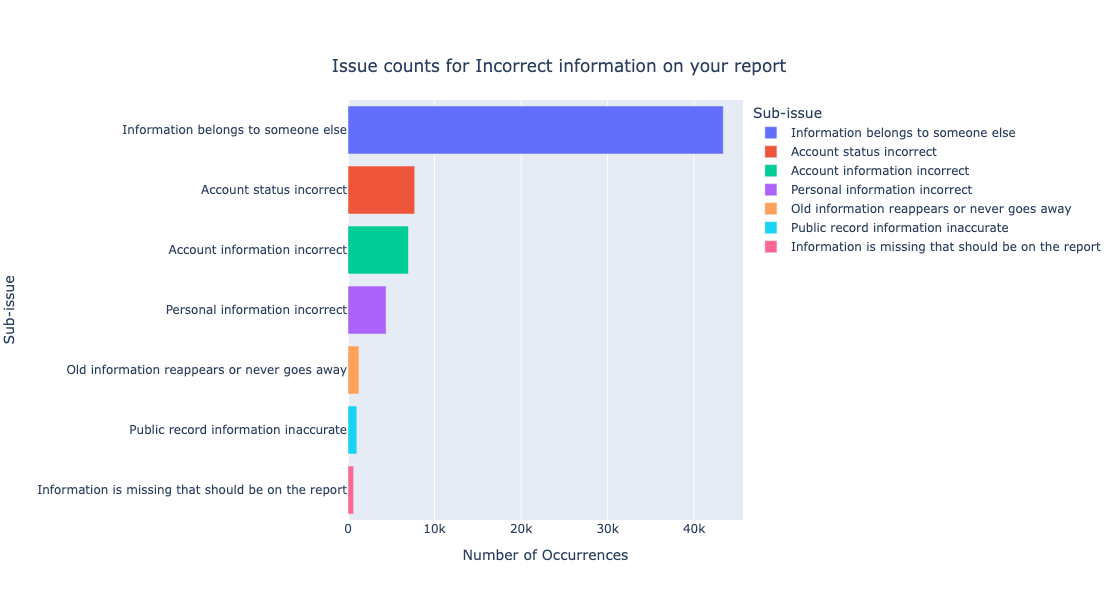

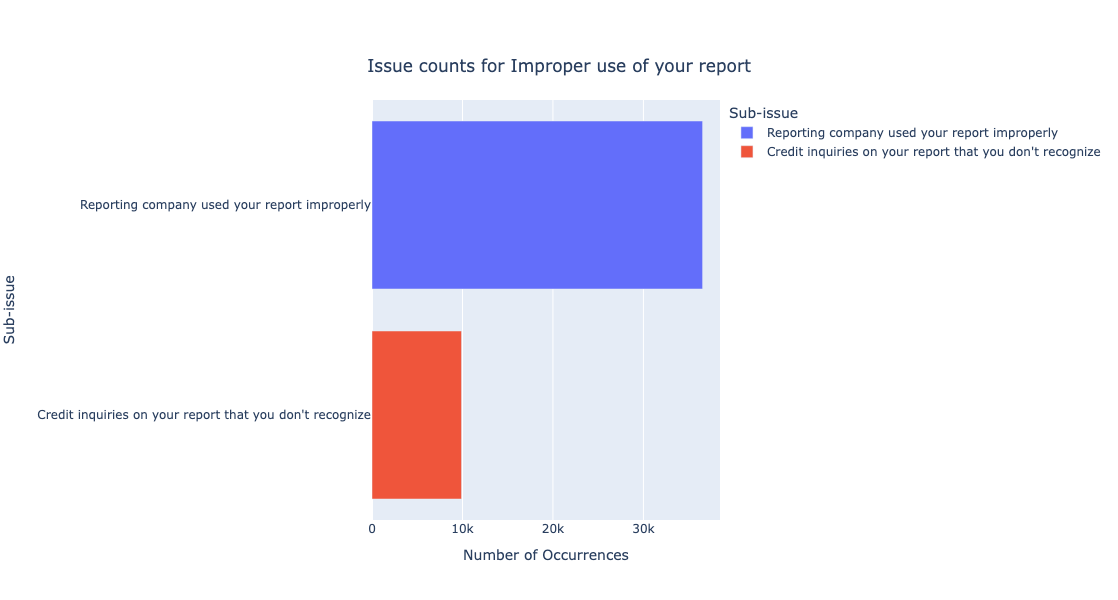

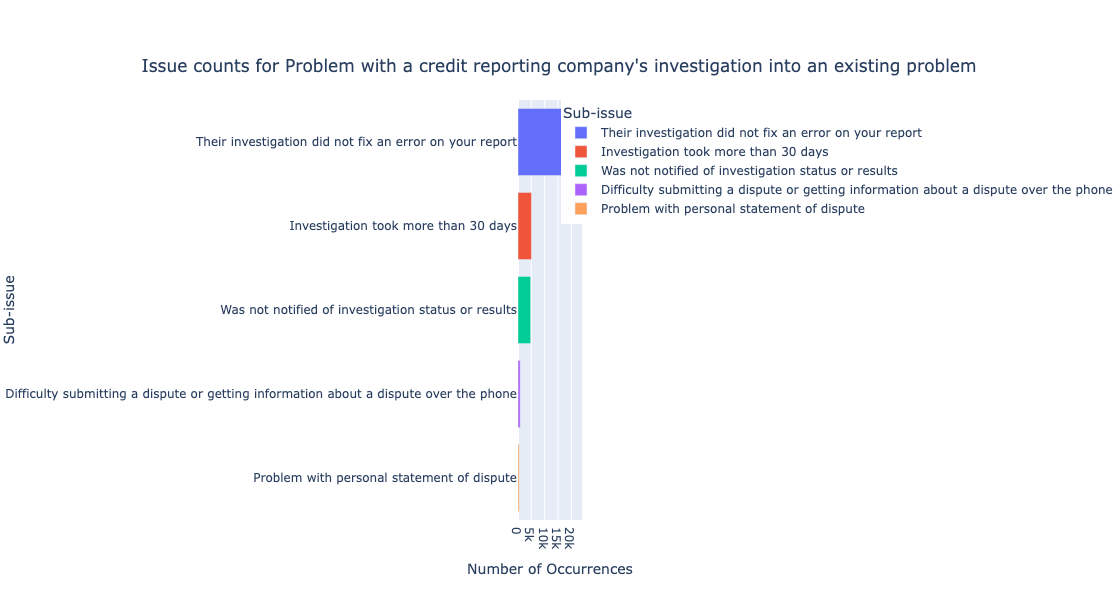

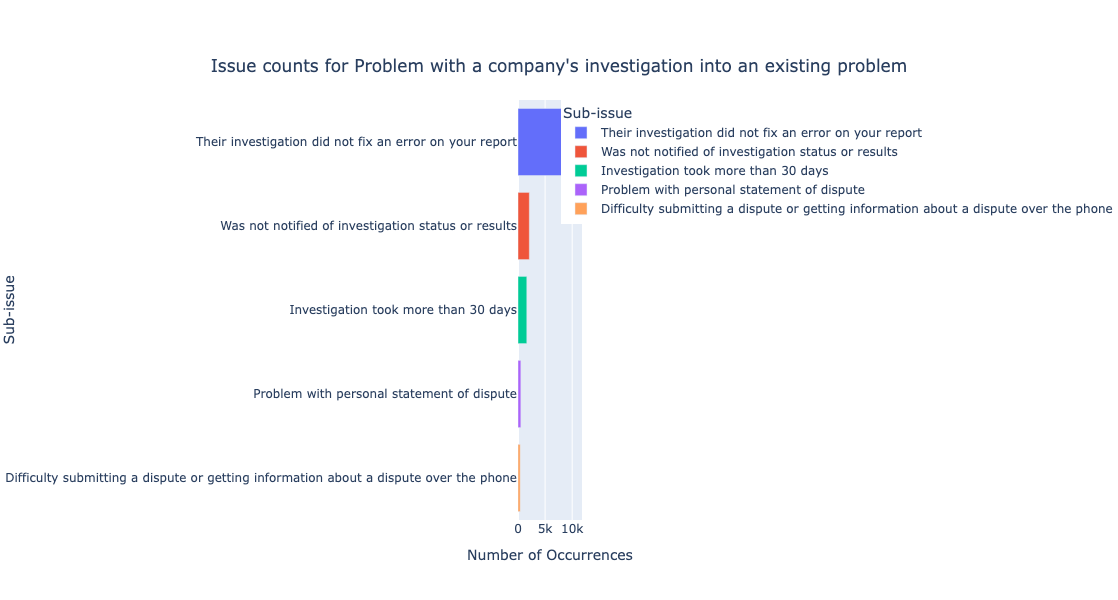

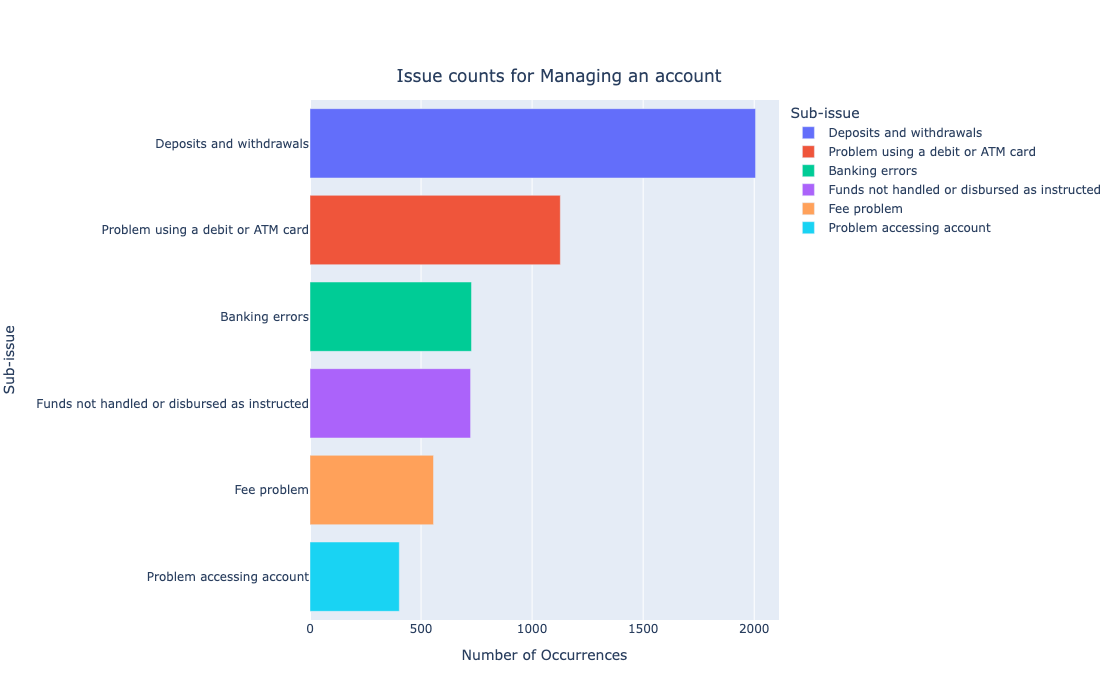

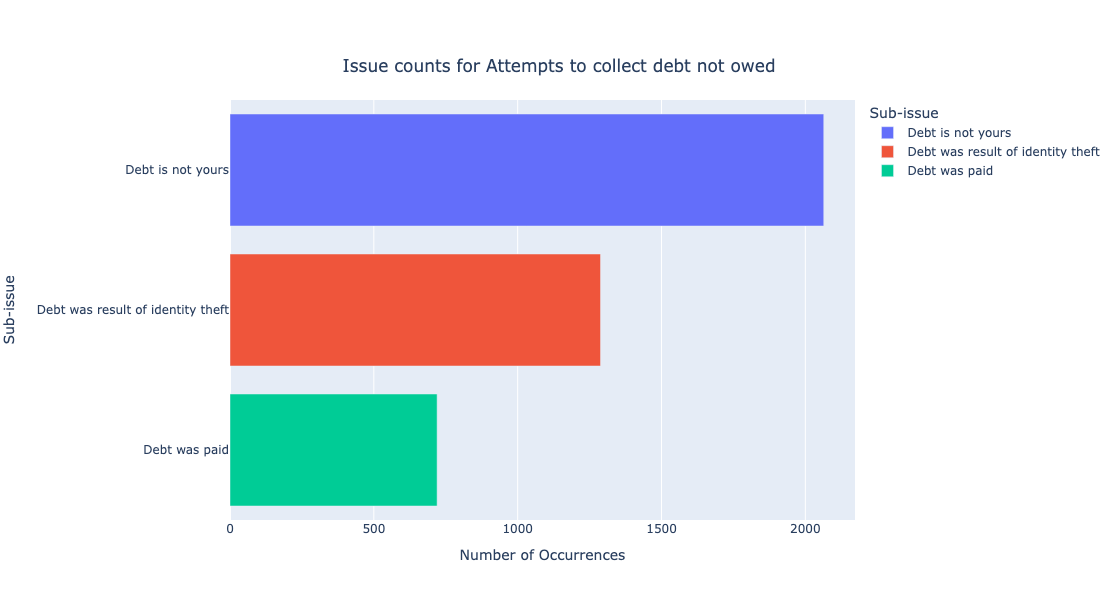

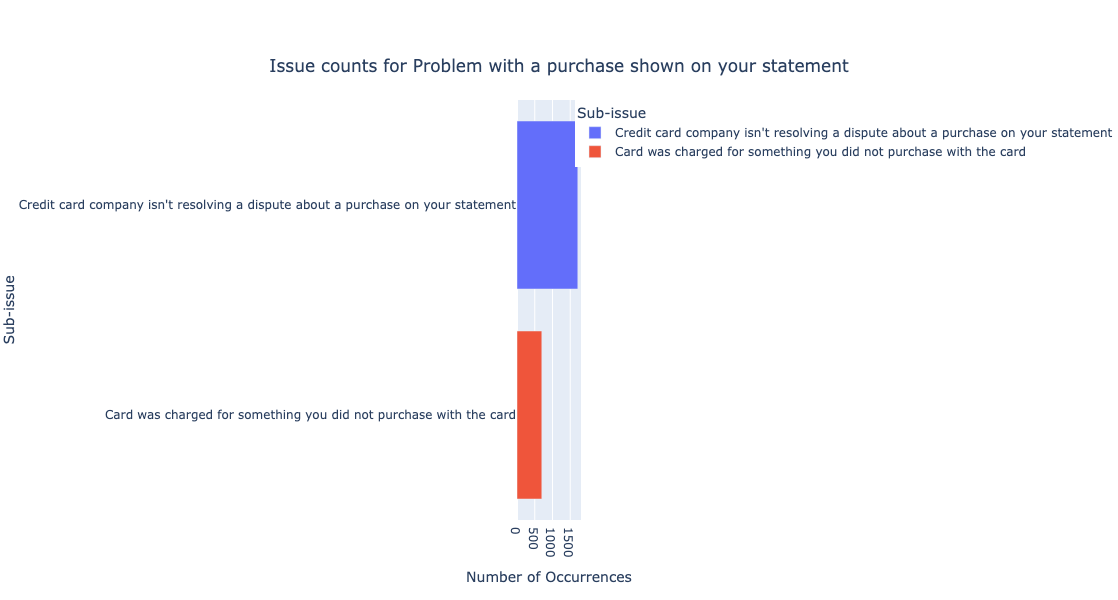

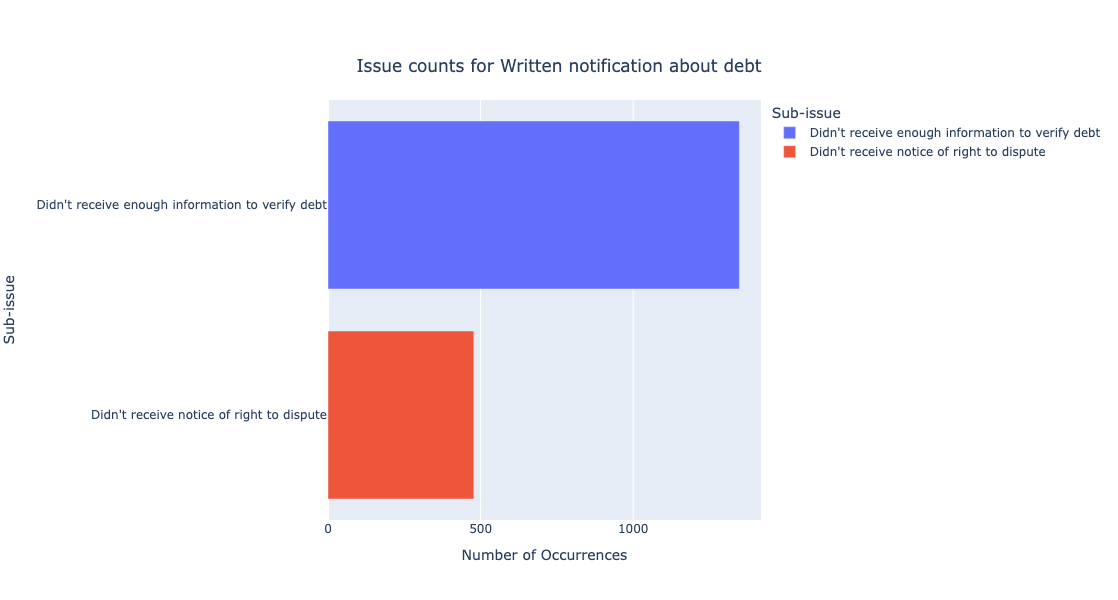

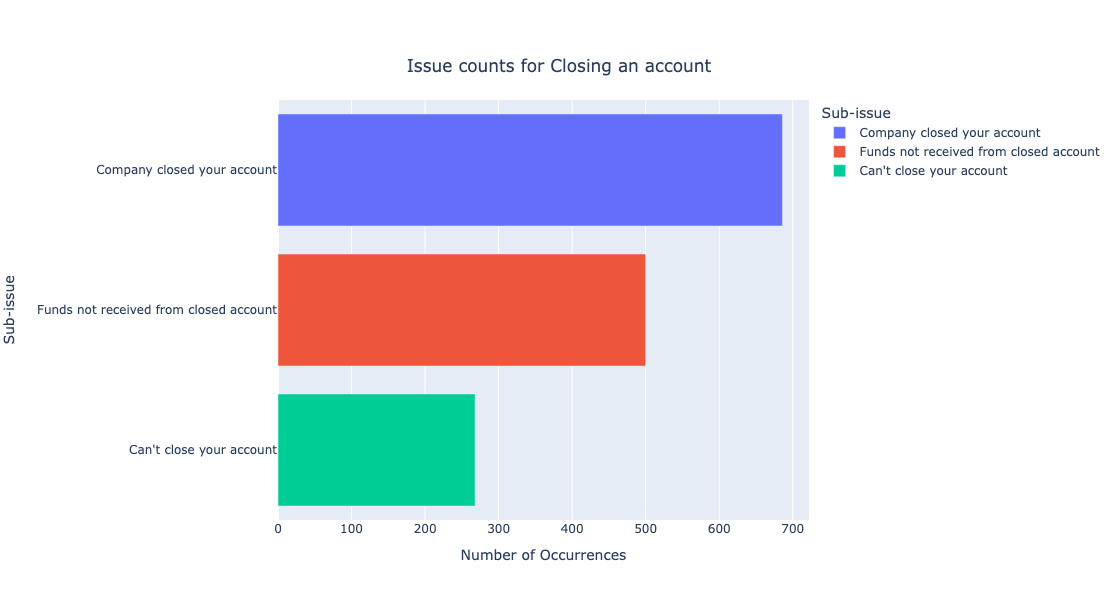

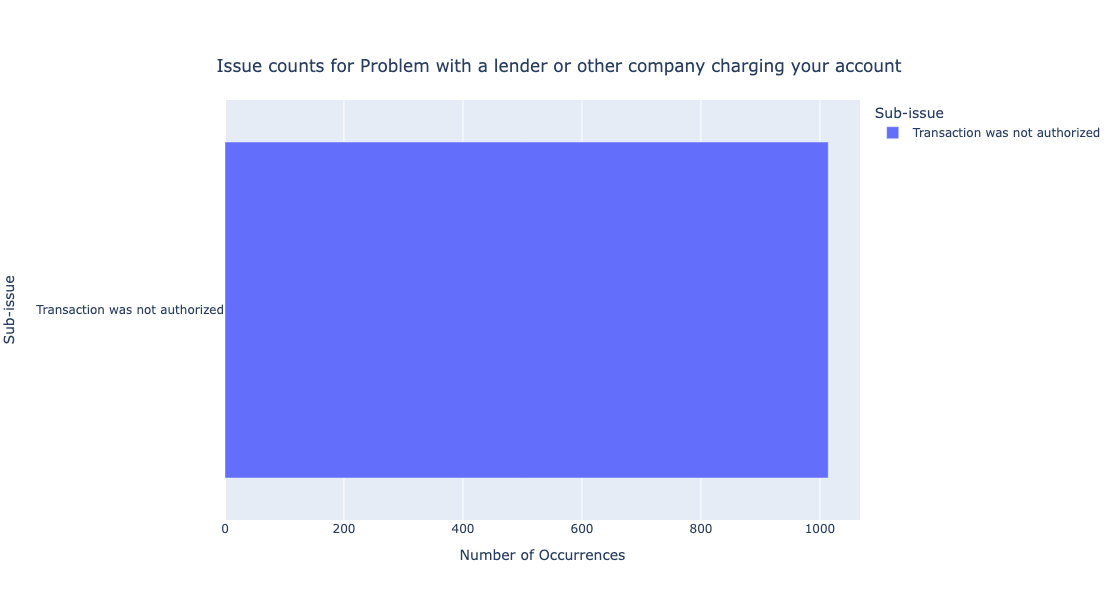

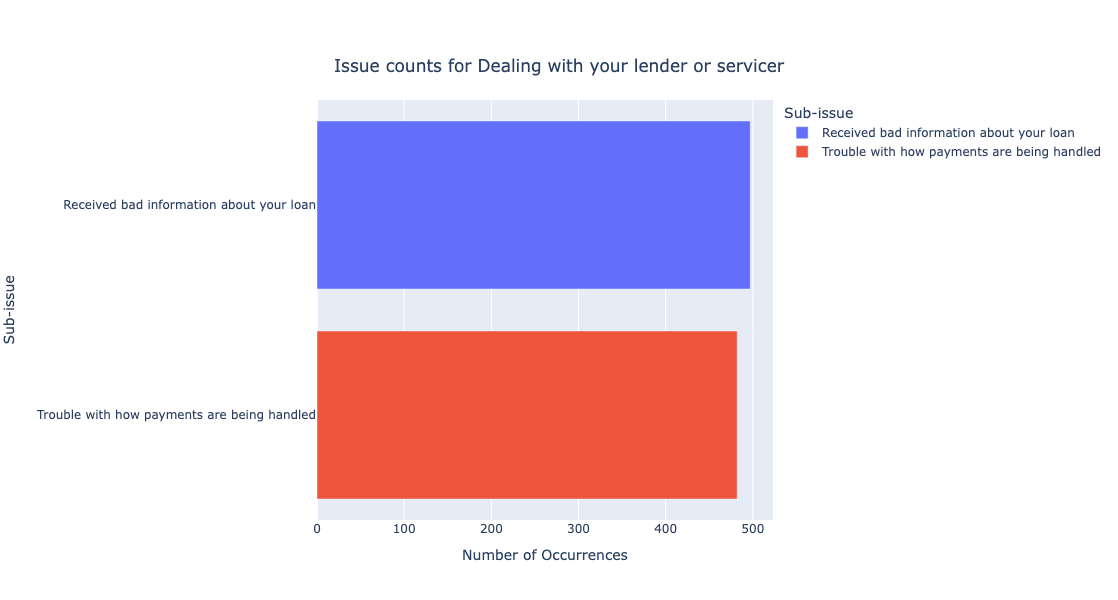

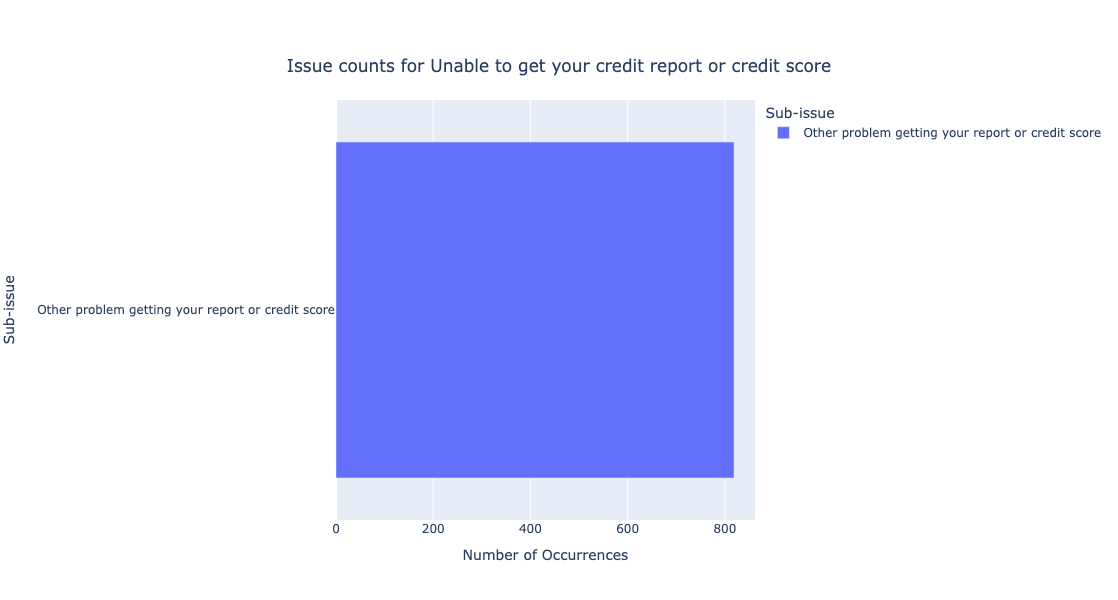

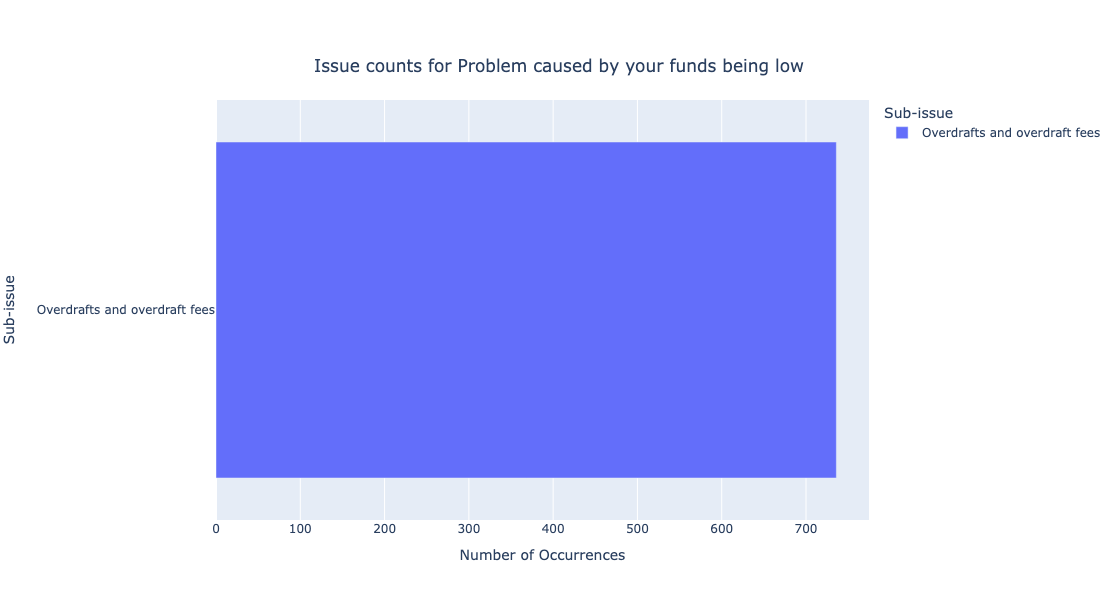

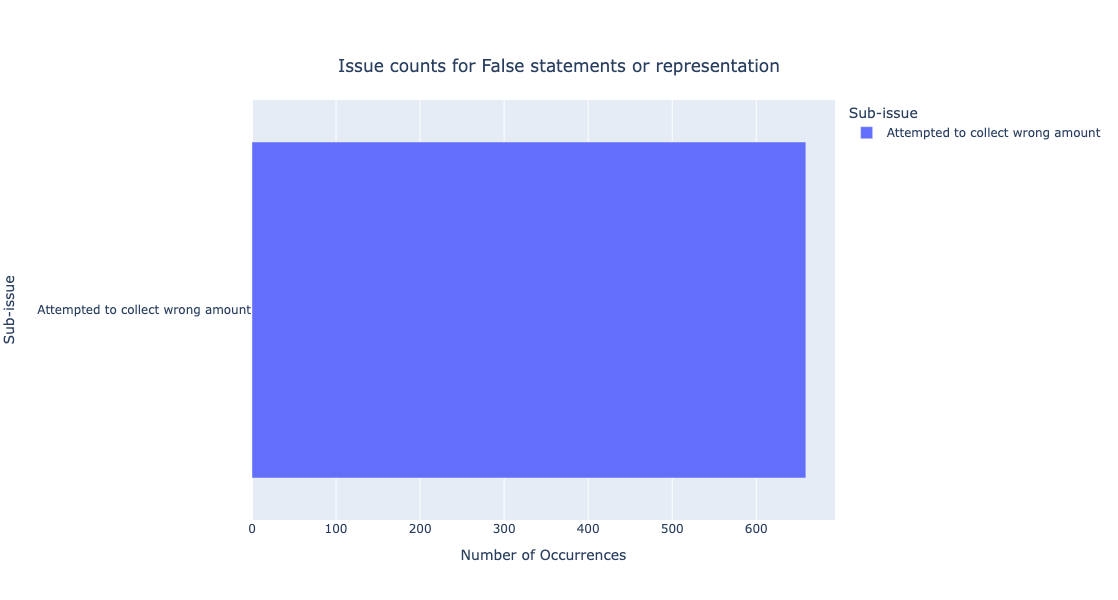

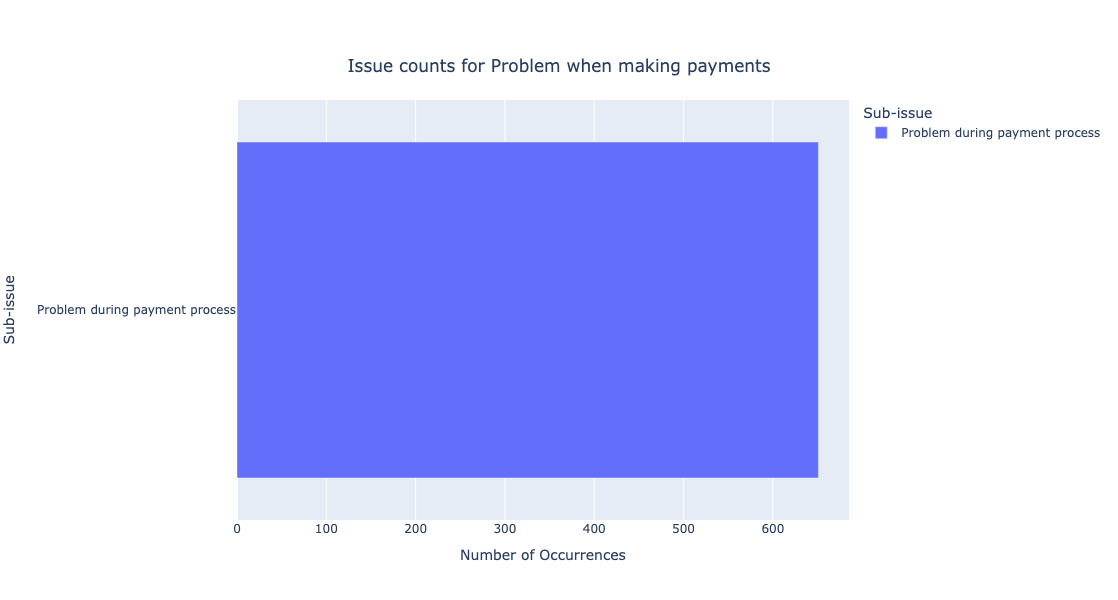

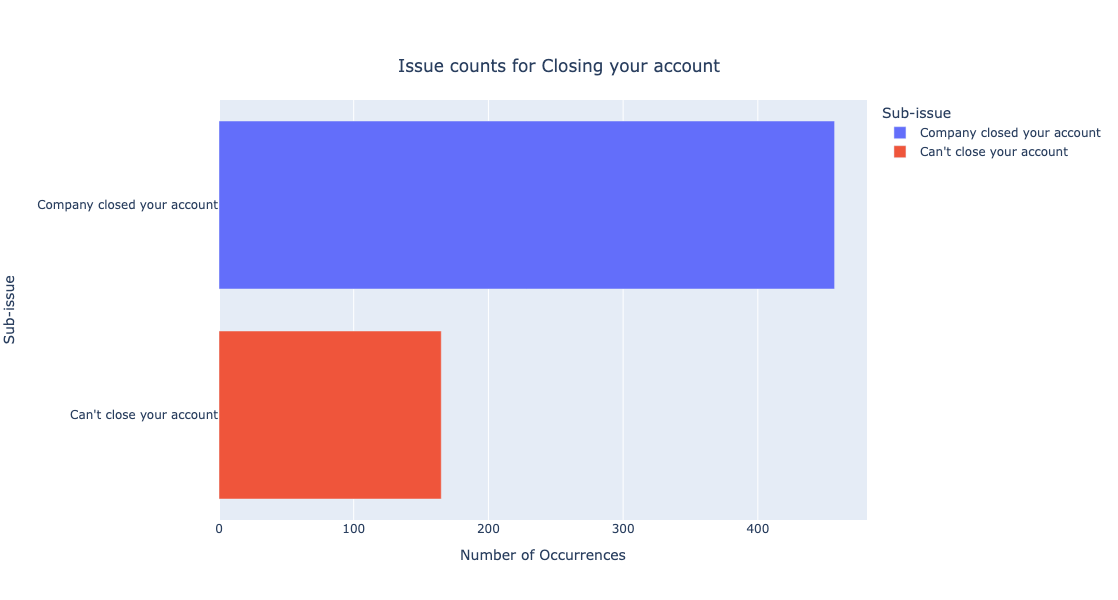

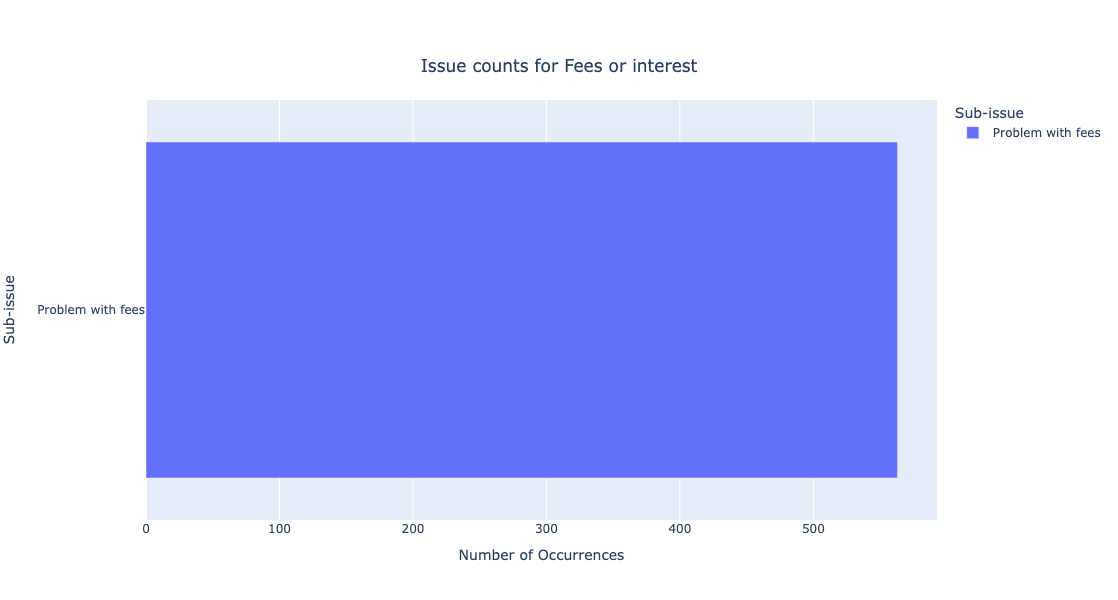

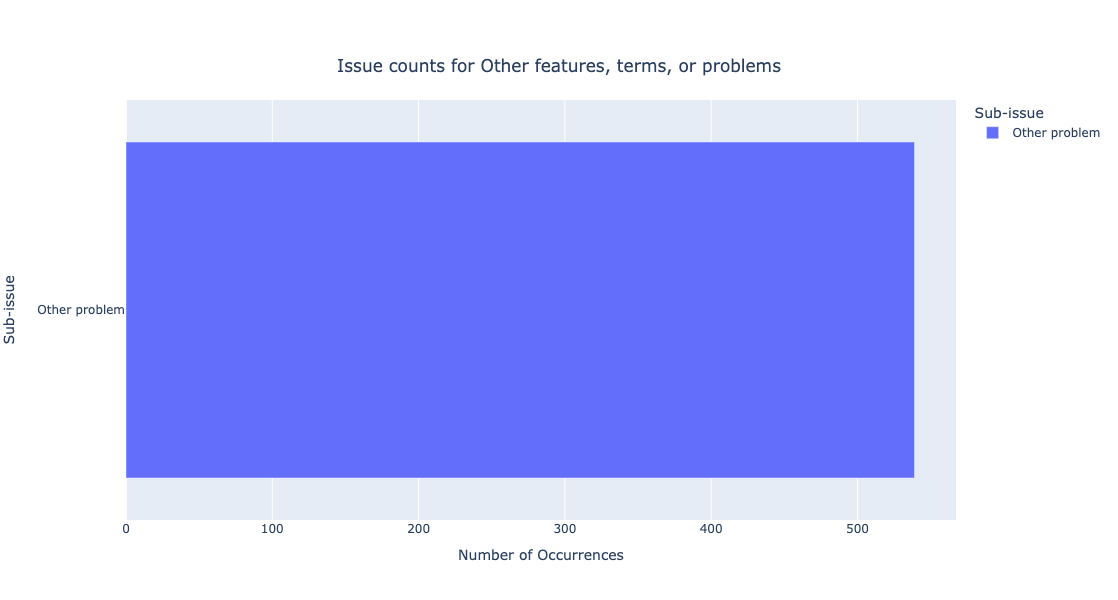

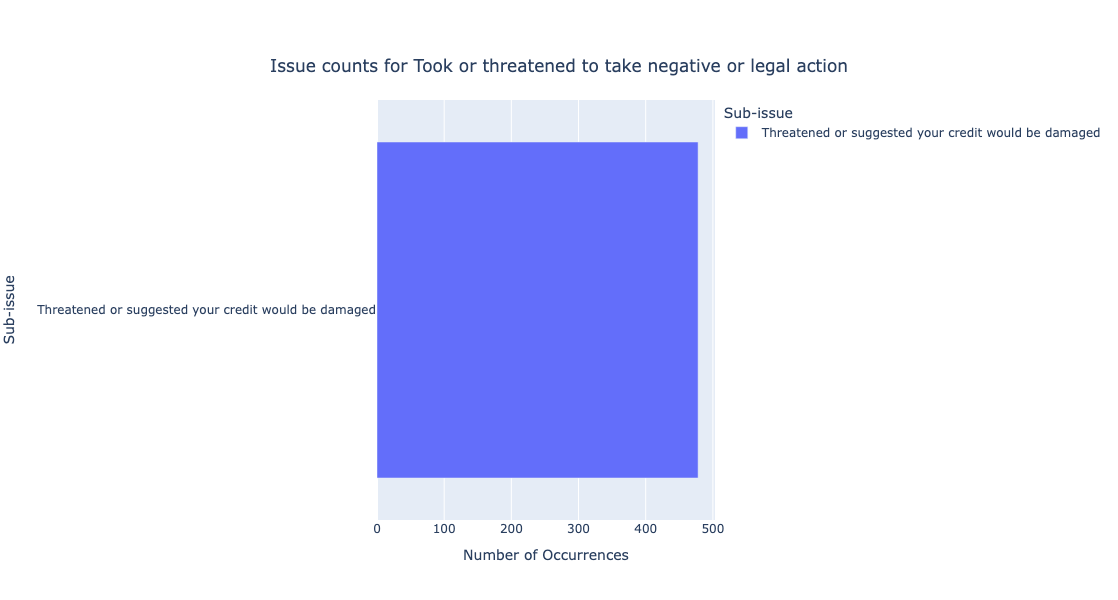

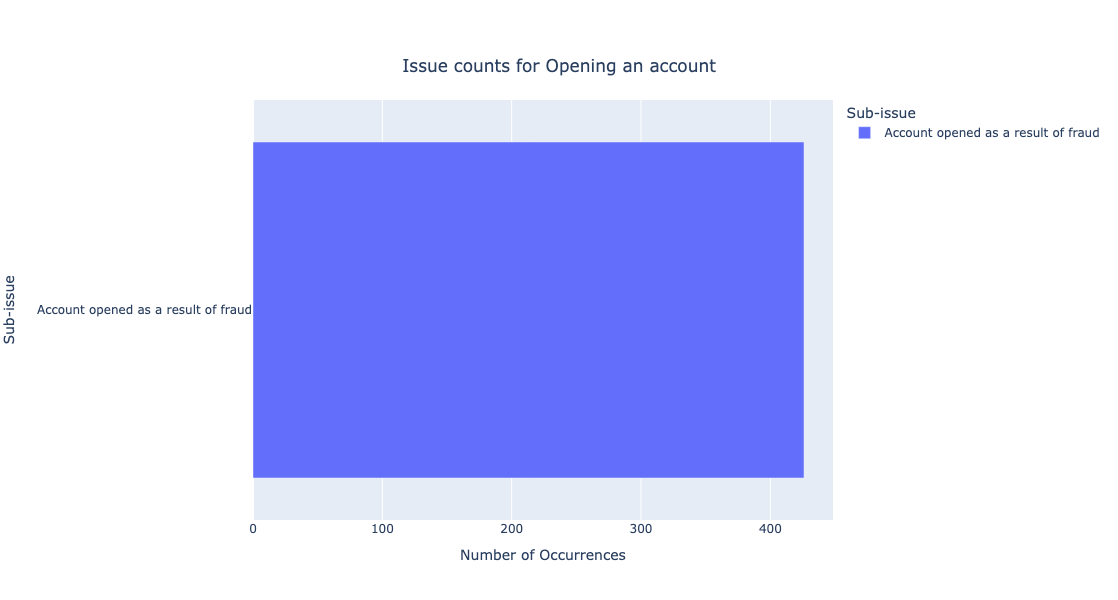

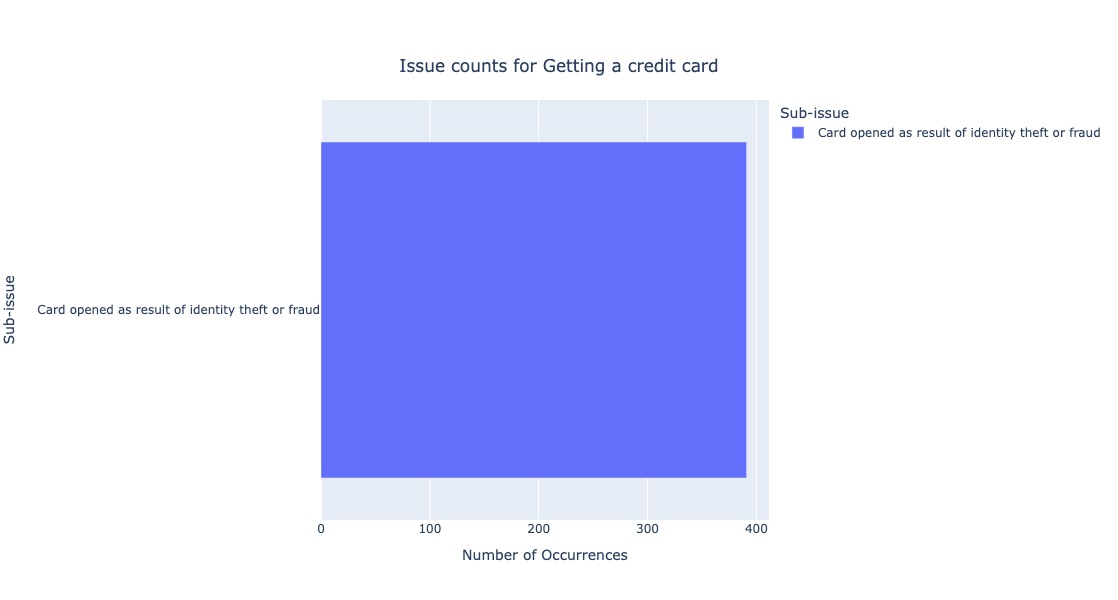

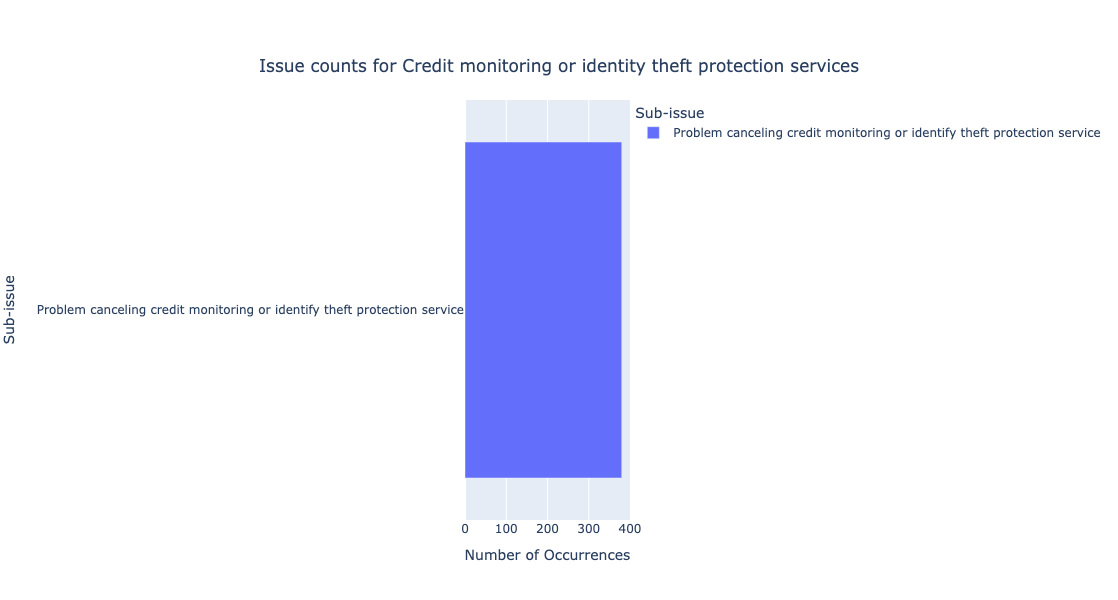

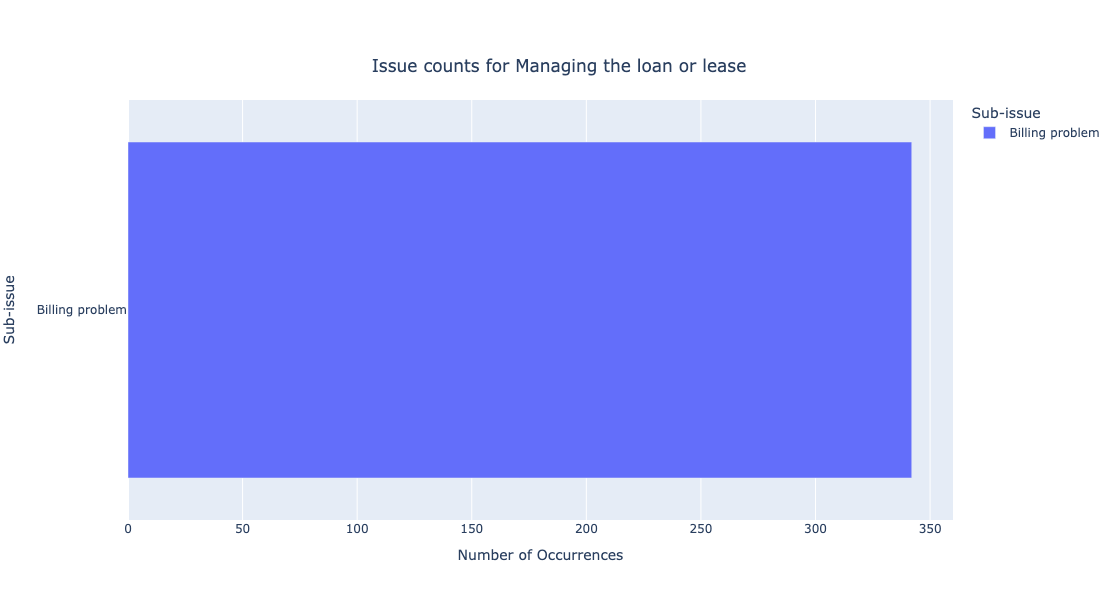

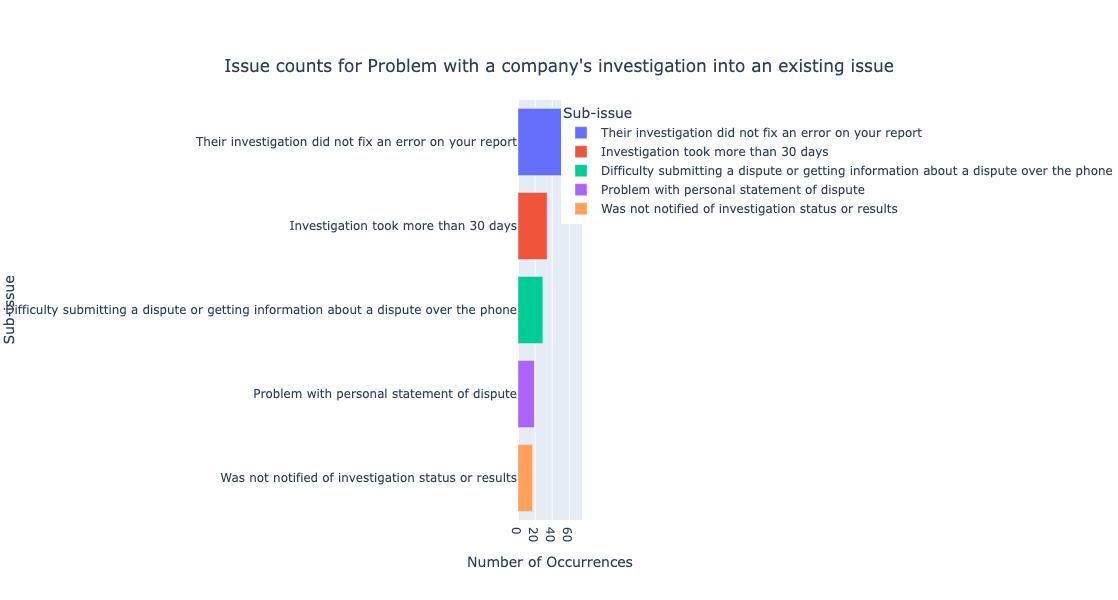

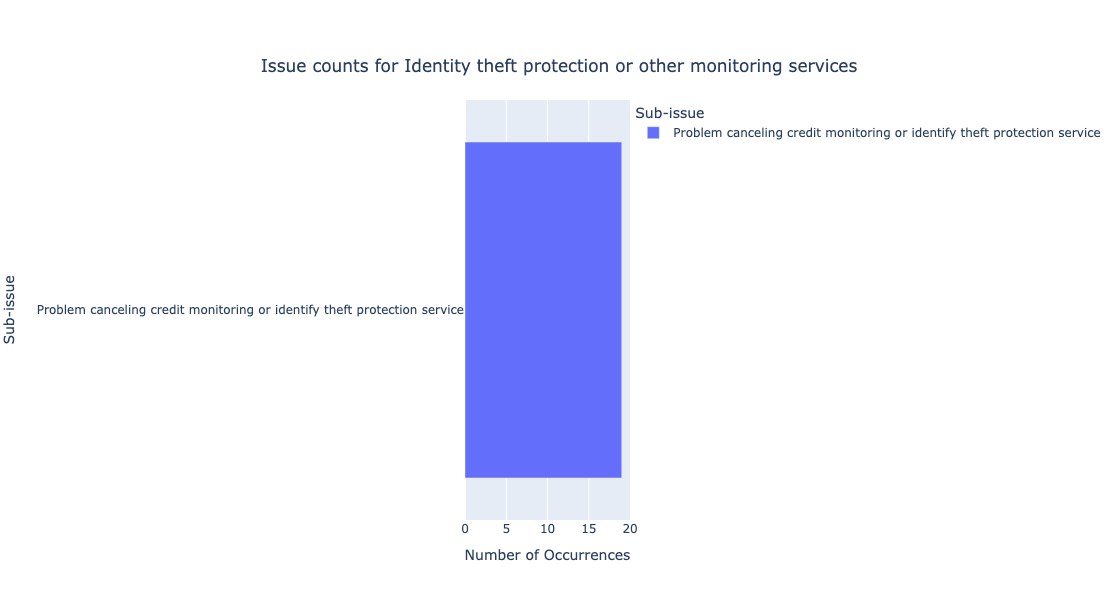

In [7]:
for i,issue in enumerate(issues_df['Issue'].value_counts().index):
    subissue = issues_df[issues_df['Issue'] == issue]
    subissue_counts = subissue['Sub-issue'].value_counts().reset_index()
    subissue_counts.columns = ['Sub-issue', 'Count']
    
    fig = px.bar(subissue_counts, y='Sub-issue', x='Count', color='Sub-issue',
                 title=f"Issue Count for {issue}",
                 width = 1400,
                 height = 600 if i!=4 else 700,
                 labels={'Count': 'Number of Occurrences'}, # Customizing axis labels
                 orientation='h') # Horizontal bars
    
    fig.update_layout(
        title={
            'text': f"Issue counts for {issue}",
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )
    
    fig.show()

In [8]:
issues_to_subissues = {}
for issue in issues_df['Issue'].value_counts().index:
    issues_to_subissues[issue] = list(issues_df[issues_df['Issue'] == issue]['Sub-issue'].value_counts().to_dict().keys())

In [9]:
for issue, sub_issues in issues_to_subissues.items():
    print(f"Issue : {issue}")
    print(sub_issues)
    print()

Issue : Incorrect information on your report
['Information belongs to someone else', 'Account status incorrect', 'Account information incorrect', 'Personal information incorrect', 'Old information reappears or never goes away', 'Public record information inaccurate', 'Information is missing that should be on the report']

Issue : Improper use of your report
['Reporting company used your report improperly', "Credit inquiries on your report that you don't recognize"]

Issue : Problem with a credit reporting company's investigation into an existing problem
['Their investigation did not fix an error on your report', 'Investigation took more than 30 days', 'Was not notified of investigation status or results', 'Difficulty submitting a dispute or getting information about a dispute over the phone', 'Problem with personal statement of dispute']

Issue : Problem with a company's investigation into an existing problem
['Their investigation did not fix an error on your report', 'Was not notified

In [10]:
one_subissue = {key : value for key,value in issues_to_subissues.items() if len(issues_to_subissues[key]) == 1}

In [11]:
for issue, sub_issues in one_subissue.items():
    print(f"Issue : {issue}")
    print(sub_issues)
    print()

Issue : Problem with a lender or other company charging your account
['Transaction was not authorized']

Issue : Unable to get your credit report or credit score
['Other problem getting your report or credit score']

Issue : Problem caused by your funds being low
['Overdrafts and overdraft fees']

Issue : False statements or representation
['Attempted to collect wrong amount']

Issue : Problem when making payments
['Problem during payment process']

Issue : Fees or interest
['Problem with fees']

Issue : Other features, terms, or problems
['Other problem']

Issue : Took or threatened to take negative or legal action
['Threatened or suggested your credit would be damaged']

Issue : Opening an account
['Account opened as a result of fraud']

Issue : Getting a credit card
['Card opened as result of identity theft or fraud']

Issue : Credit monitoring or identity theft protection services
['Problem canceling credit monitoring or identify theft protection service']

Issue : Managing the loa

In [12]:
more_than_one_subissue = {key : value for key,value in issues_to_subissues.items() if len(issues_to_subissues[key]) > 1}

In [13]:
existing_issue_mapping = {issue : issue for issue in more_than_one_subissue}
existing_issue_mapping

{'Incorrect information on your report': 'Incorrect information on your report',
 'Improper use of your report': 'Improper use of your report',
 "Problem with a credit reporting company's investigation into an existing problem": "Problem with a credit reporting company's investigation into an existing problem",
 "Problem with a company's investigation into an existing problem": "Problem with a company's investigation into an existing problem",
 'Managing an account': 'Managing an account',
 'Attempts to collect debt not owed': 'Attempts to collect debt not owed',
 'Problem with a purchase shown on your statement': 'Problem with a purchase shown on your statement',
 'Written notification about debt': 'Written notification about debt',
 'Closing an account': 'Closing an account',
 'Dealing with your lender or servicer': 'Dealing with your lender or servicer',
 'Closing your account': 'Closing your account',
 "Problem with a company's investigation into an existing issue": "Problem with a

#### Grouping some minor issues into a broader issue category

In [14]:
issue_renaming = {
    'Problem with a lender or other company charging your account': 'Account Operations and Unauthorized Transaction Issues',
    'Opening an account': 'Account Operations and Unauthorized Transaction Issues',
    'Getting a credit card': 'Account Operations and Unauthorized Transaction Issues',

    'Unable to get your credit report or credit score': 'Credit Report and Monitoring Issues',
    'Credit monitoring or identity theft protection services': 'Credit Report and Monitoring Issues',
    'Identity theft protection or other monitoring services': 'Credit Report and Monitoring Issues',
    
    'Problem caused by your funds being low': 'Payment and Funds Management',
    'Problem when making payments': 'Payment and Funds Management',
    'Managing the loan or lease': 'Payment and Funds Management',

    'False statements or representation': 'Disputes and Misrepresentations',
    'Fees or interest': 'Disputes and Misrepresentations',
    'Other features, terms, or problems': 'Disputes and Misrepresentations',

    'Took or threatened to take negative or legal action': 'Legal and Threat Actions'
}

In [15]:
np.unique(list(issue_renaming.values()))

array(['Account Operations and Unauthorized Transaction Issues',
       'Credit Report and Monitoring Issues',
       'Disputes and Misrepresentations', 'Legal and Threat Actions',
       'Payment and Funds Management'], dtype='<U54')

In [16]:
issues_mapping = {**issue_renaming, **existing_issue_mapping}

In [17]:
issues_df.loc[:,'Issue'] = issues_df['Issue'].apply(lambda x : issues_mapping[x])

In [18]:
issues_df['Issue'].value_counts()

Issue
Incorrect information on your report                                                65393
Improper use of your report                                                         46434
Problem with a credit reporting company's investigation into an existing problem    33849
Problem with a company's investigation into an existing problem                     15868
Managing an account                                                                  5541
Attempts to collect debt not owed                                                    4072
Problem with a purchase shown on your statement                                      2412
Account Operations and Unauthorized Transaction Issues                               1831
Written notification about debt                                                      1826
Disputes and Misrepresentations                                                      1761
Payment and Funds Management                                                         1729
Clos

#### Merged Subissues within an Issue

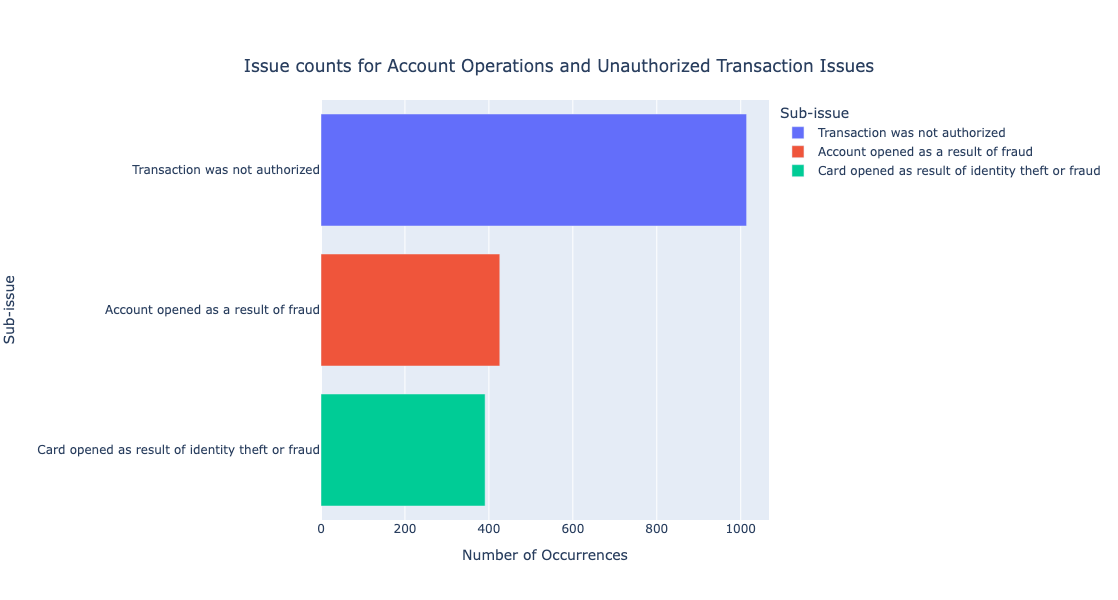

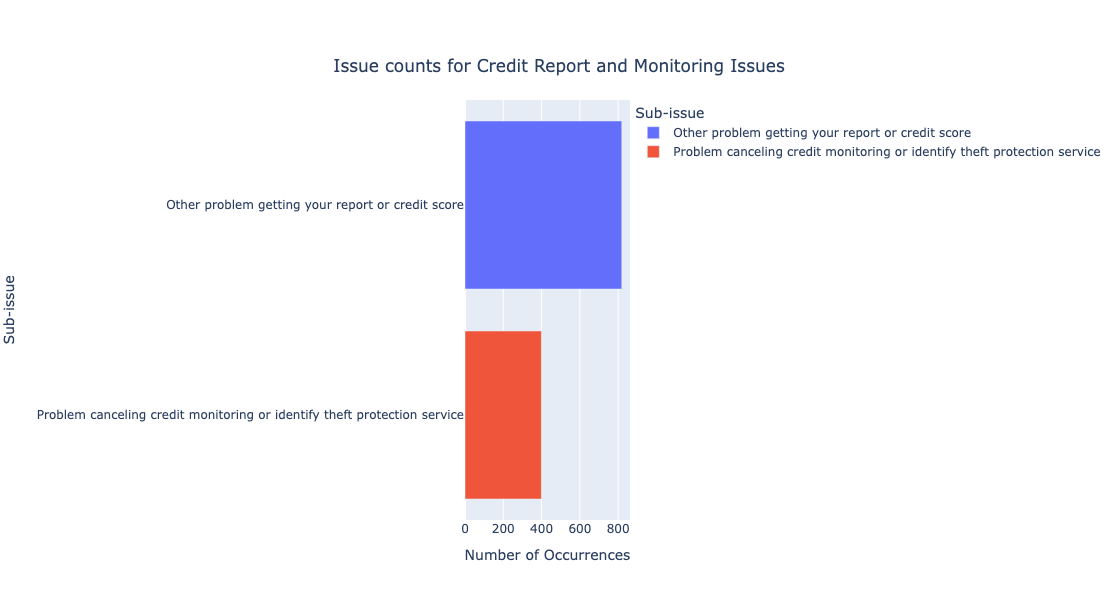

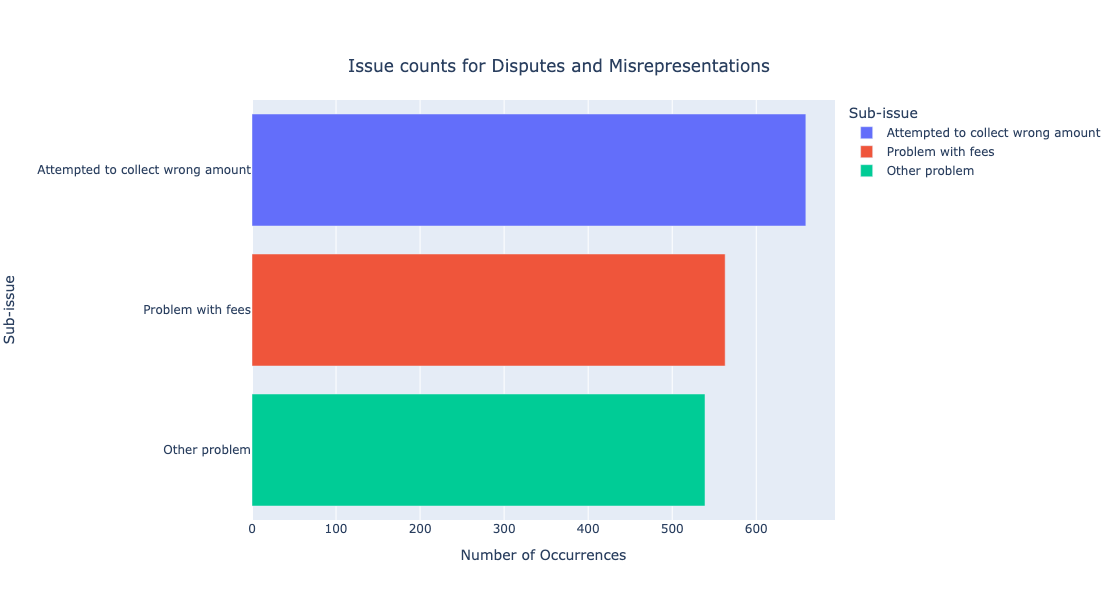

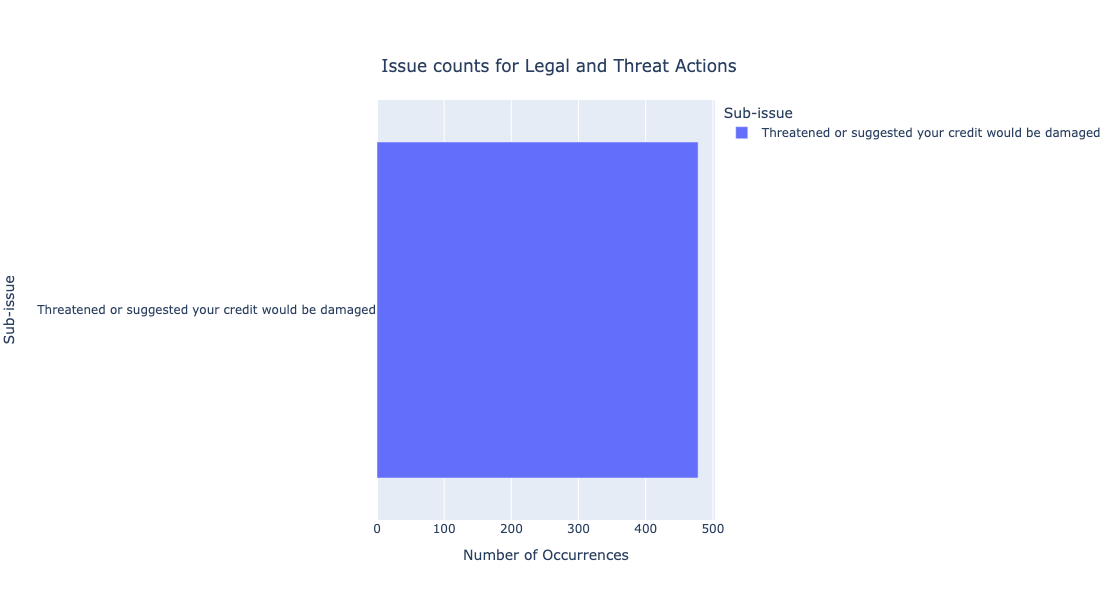

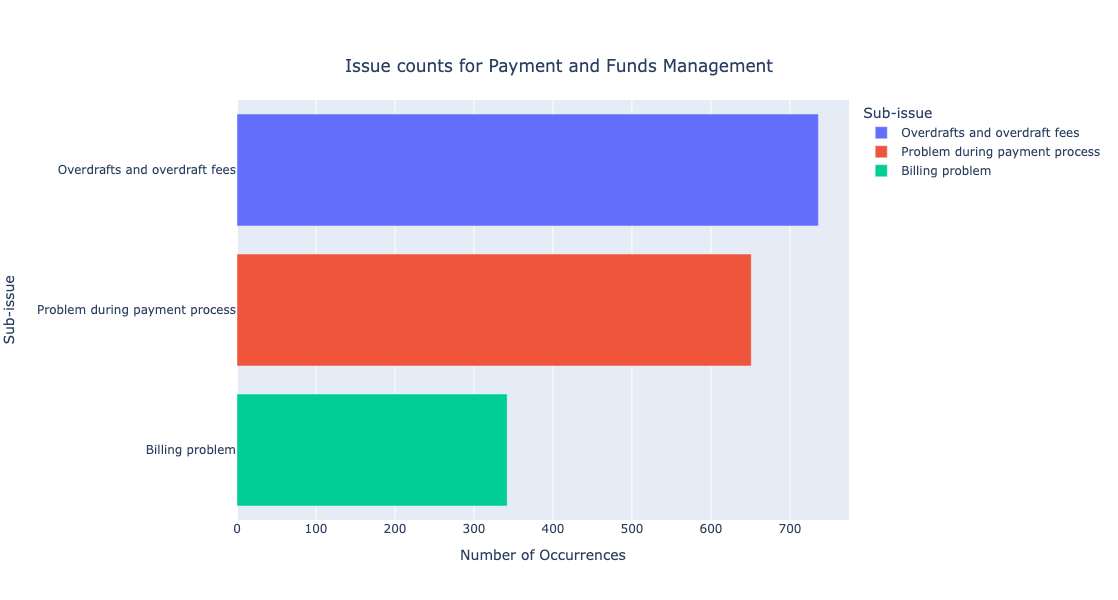

In [19]:
for i,issue in enumerate(np.unique(list(issue_renaming.values()))):
    subissue = issues_df[issues_df['Issue'] == issue]
    subissue_counts = subissue['Sub-issue'].value_counts().reset_index()
    subissue_counts.columns = ['Sub-issue', 'Count']
    
    fig = px.bar(subissue_counts, y='Sub-issue', x='Count', color='Sub-issue',
                 title=f"Issue Count for {issue}",
                 width = 1400,
                 height = 600,
                 labels={'Count': 'Number of Occurrences'}, # Customizing axis labels
                 orientation='h') # Horizontal bars
    
    fig.update_layout(
        title={
            'text': f"Issue counts for {issue}",
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )
    
    fig.show()

#### All Subissues within an Issue

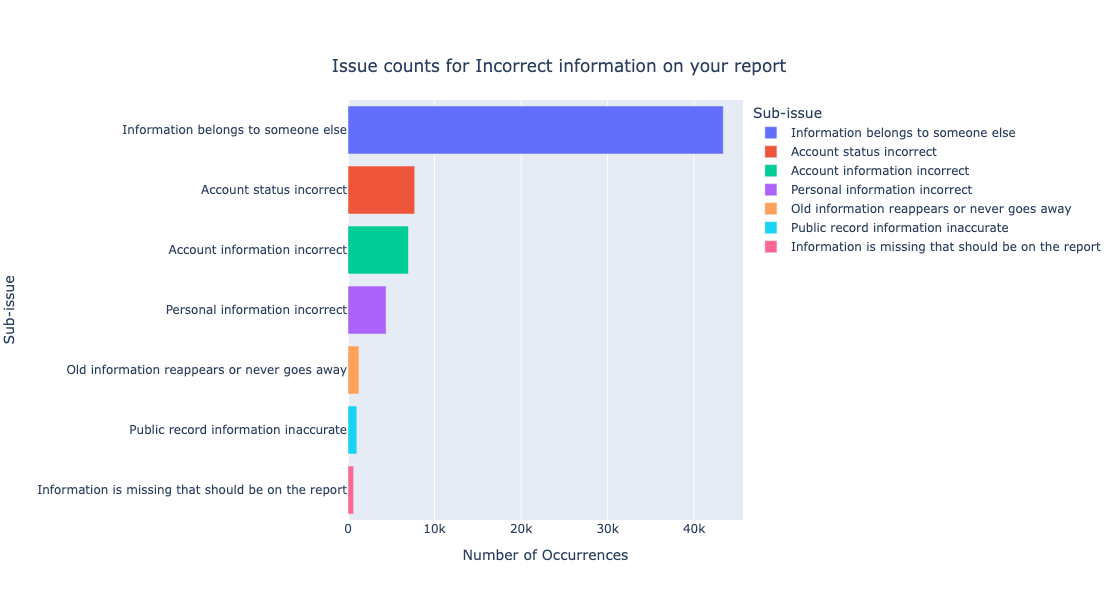

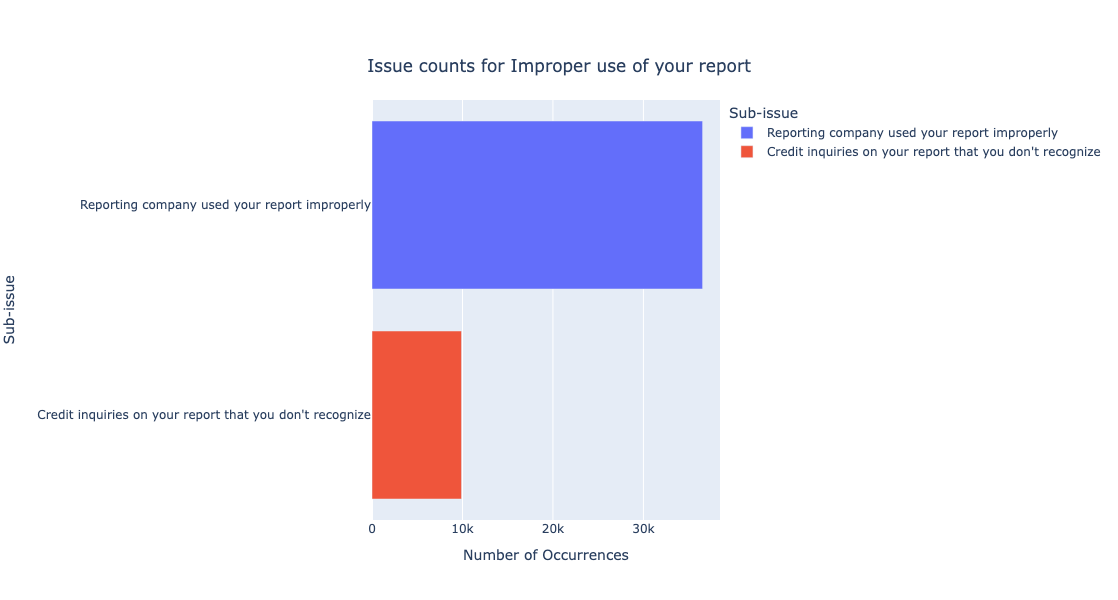

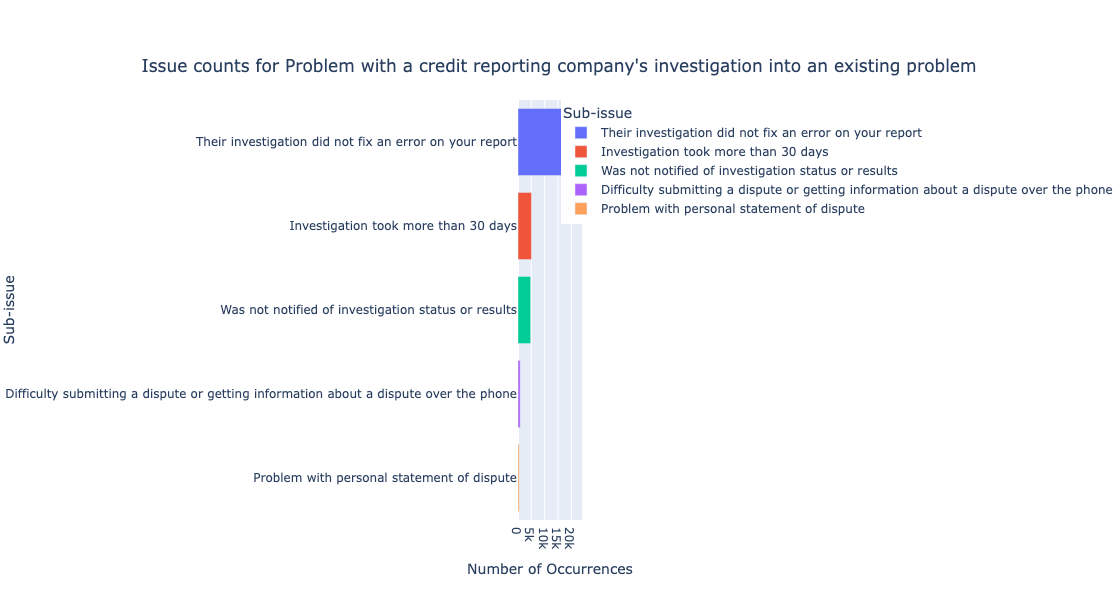

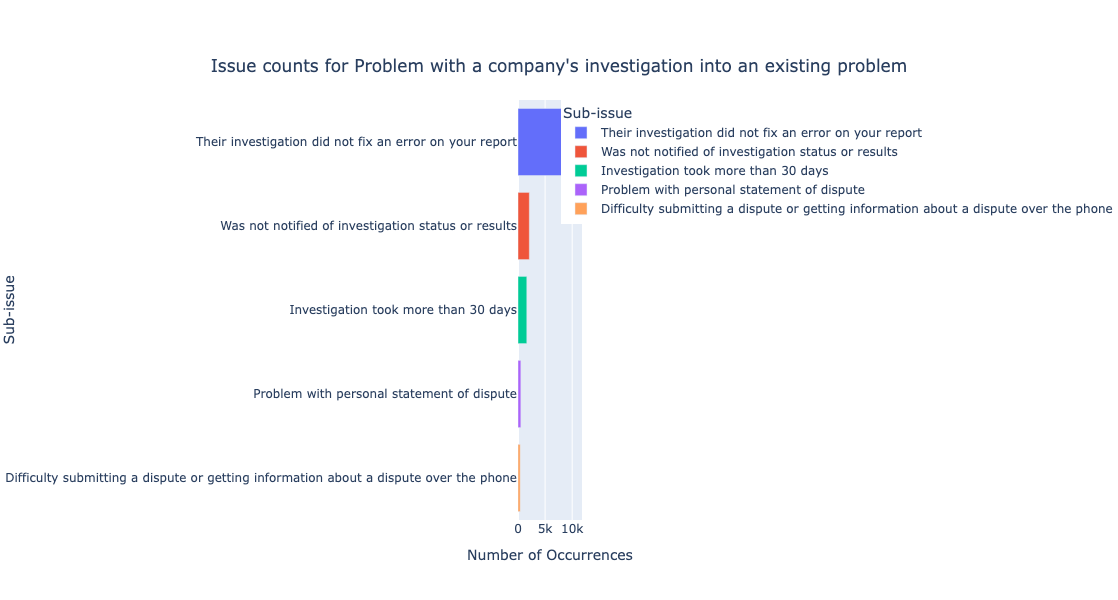

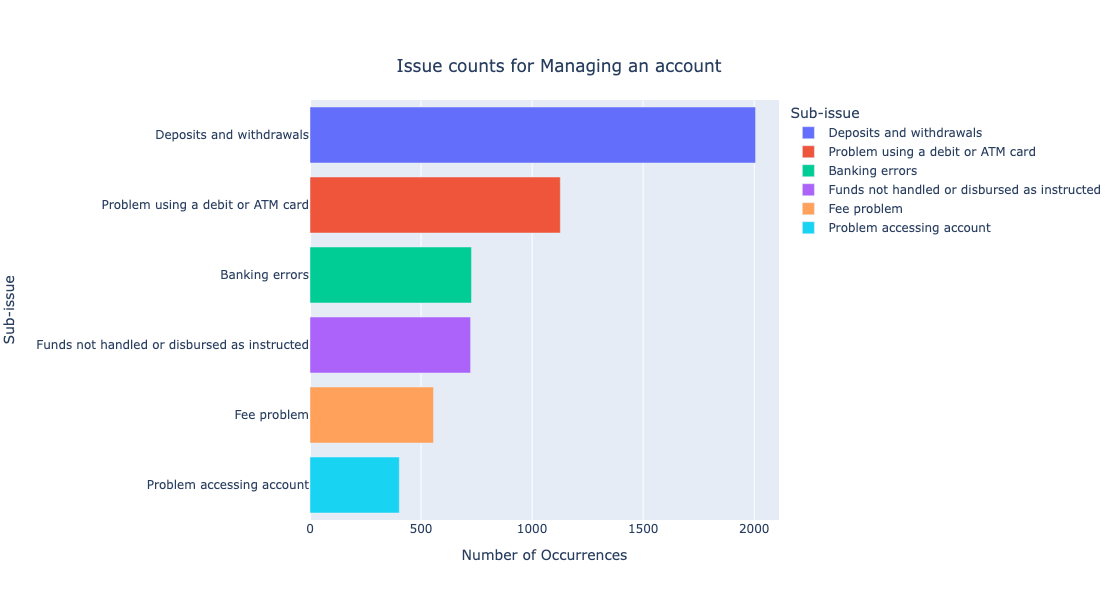

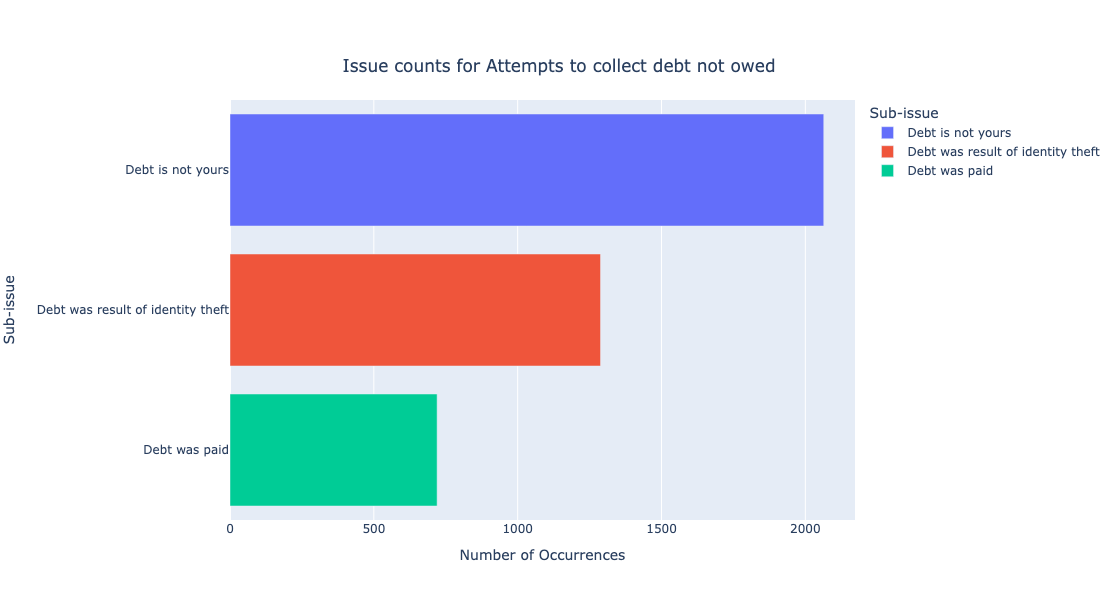

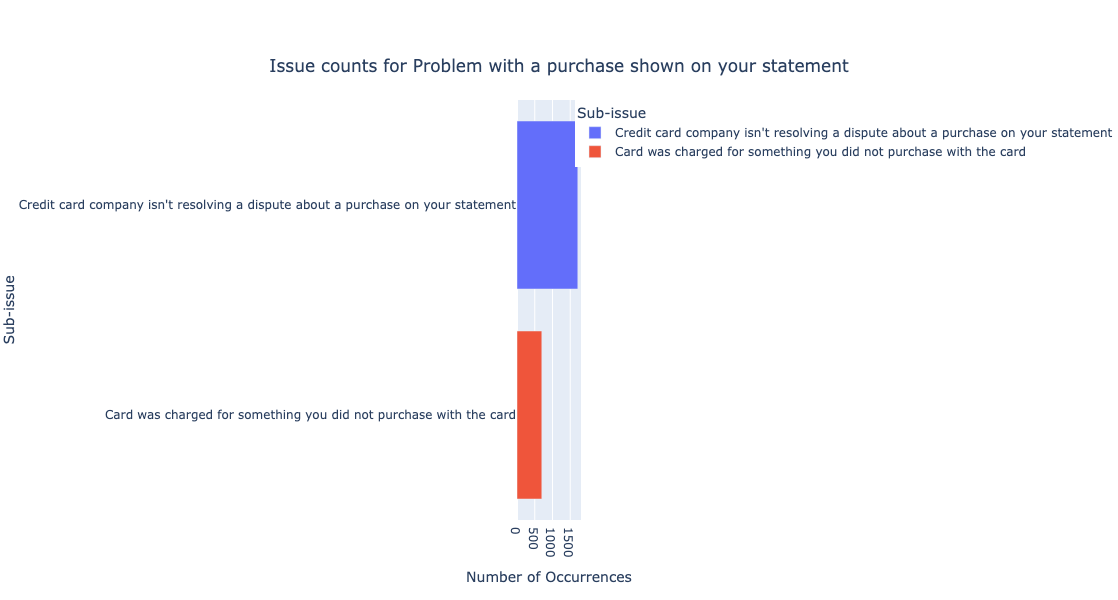

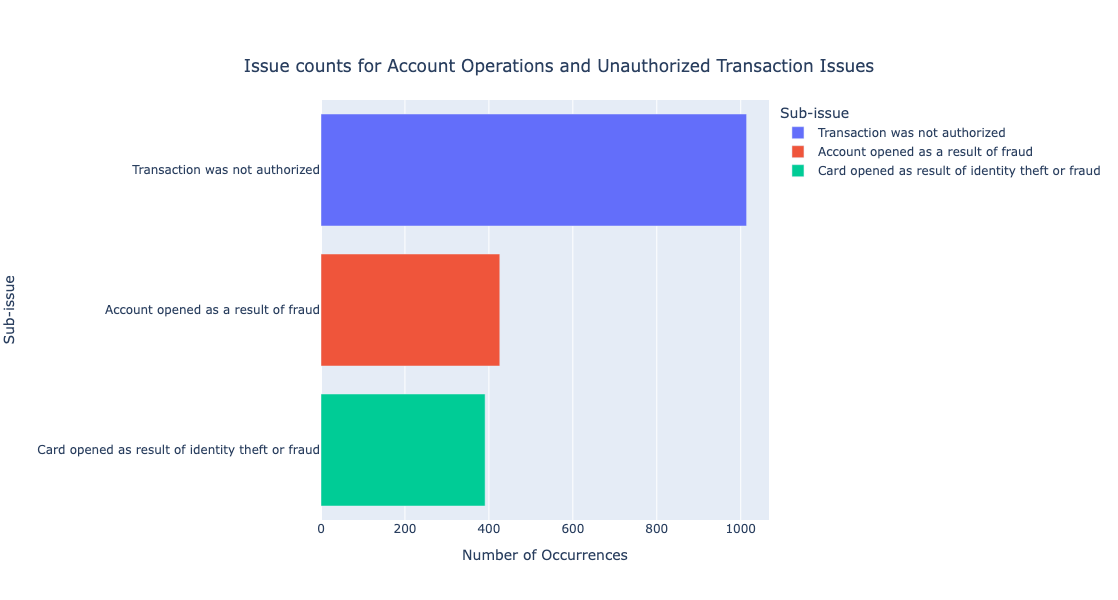

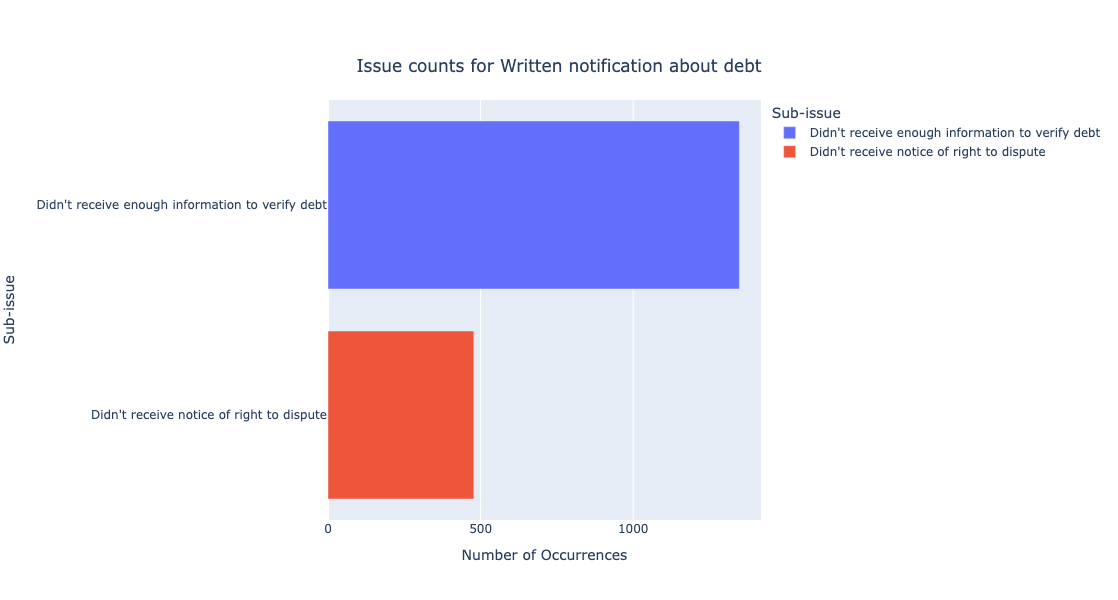

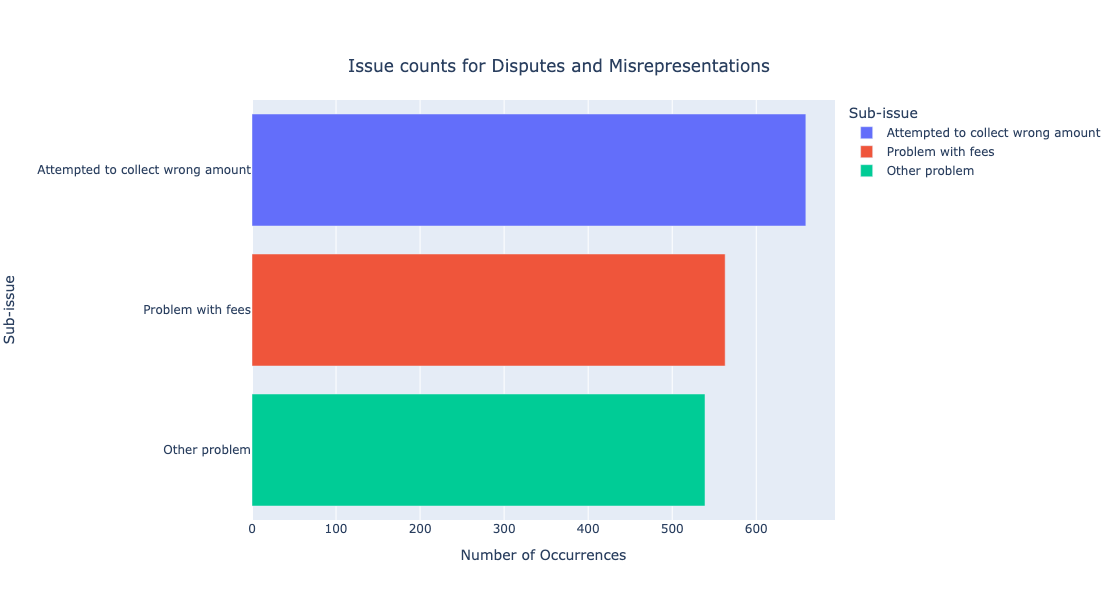

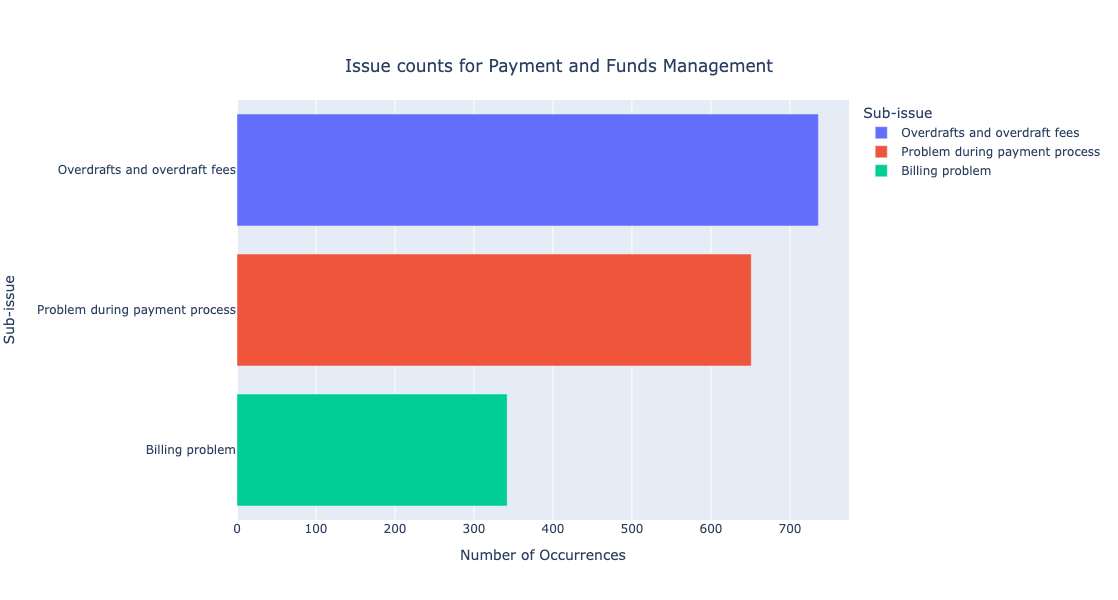

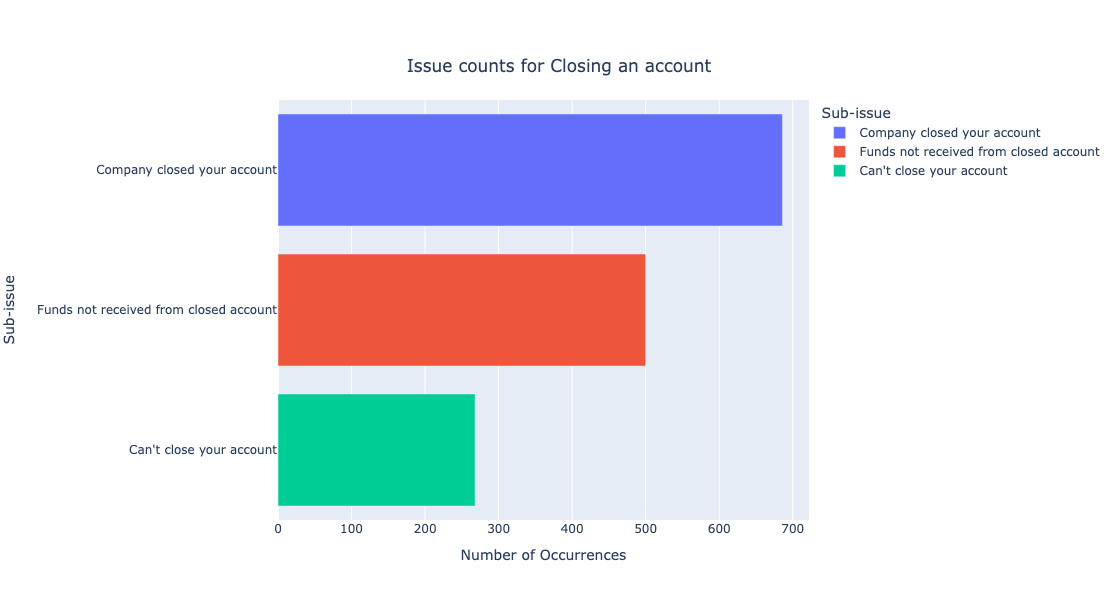

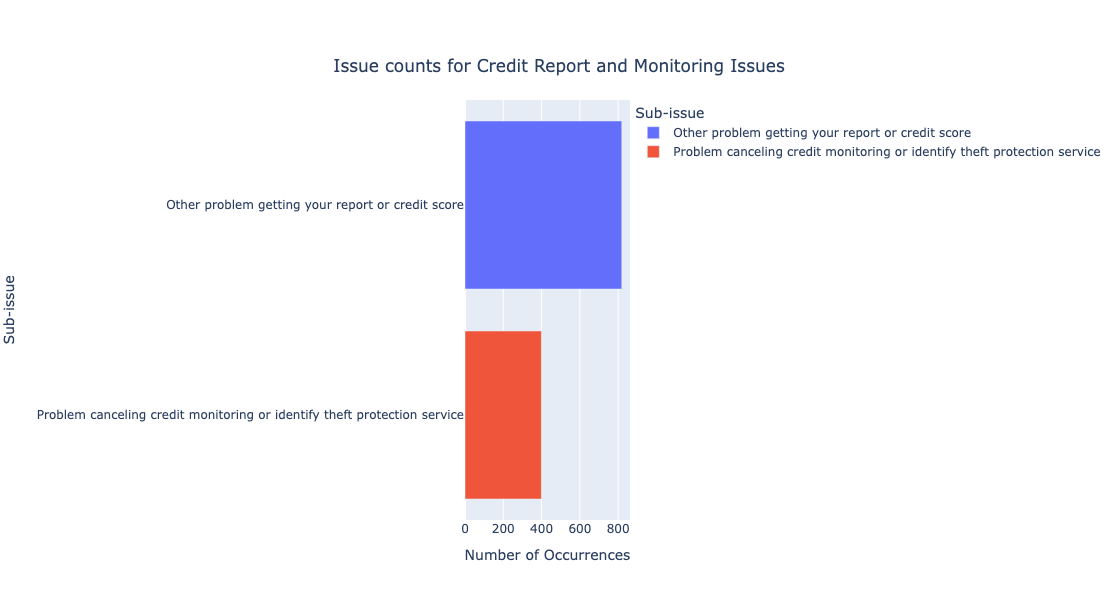

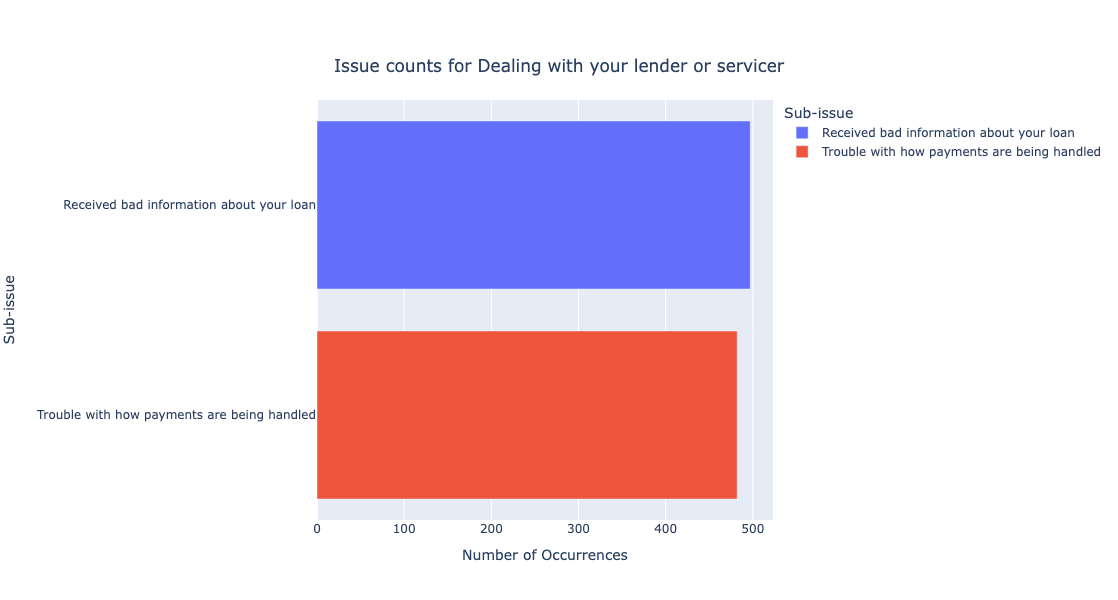

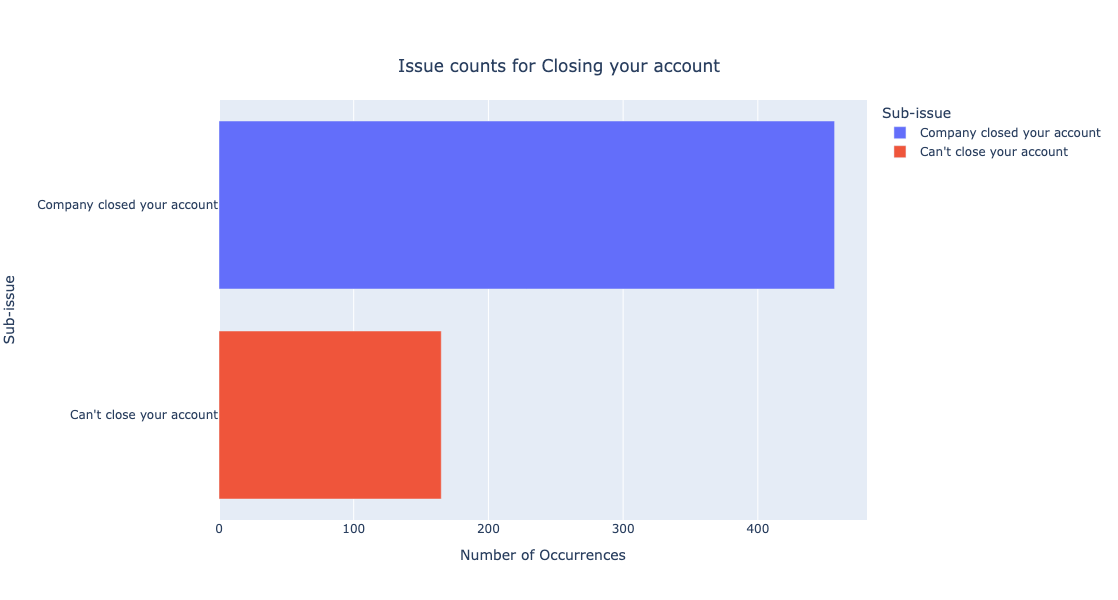

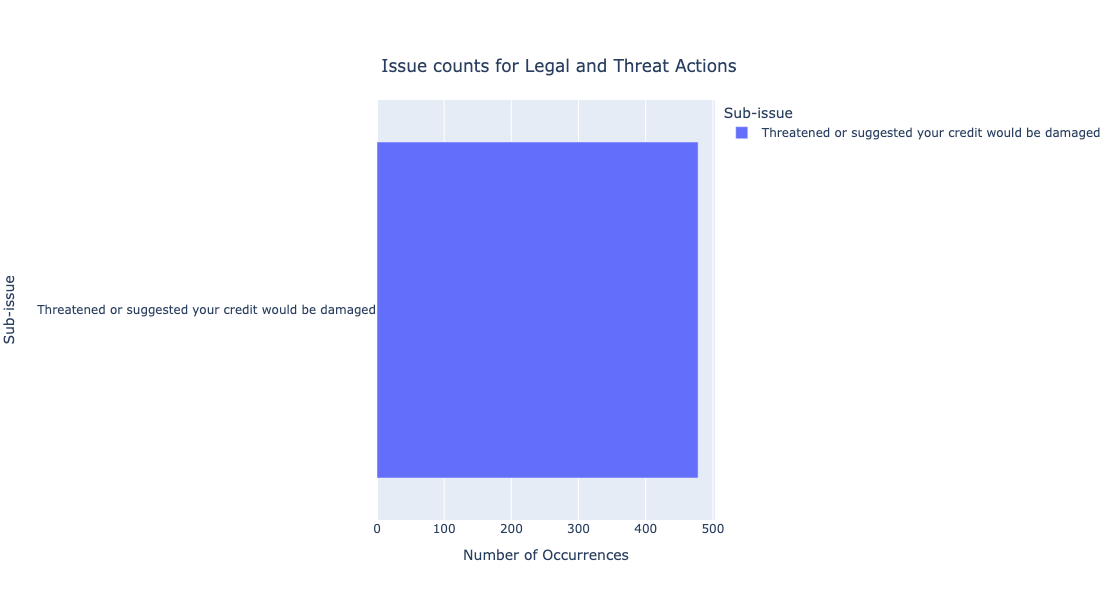

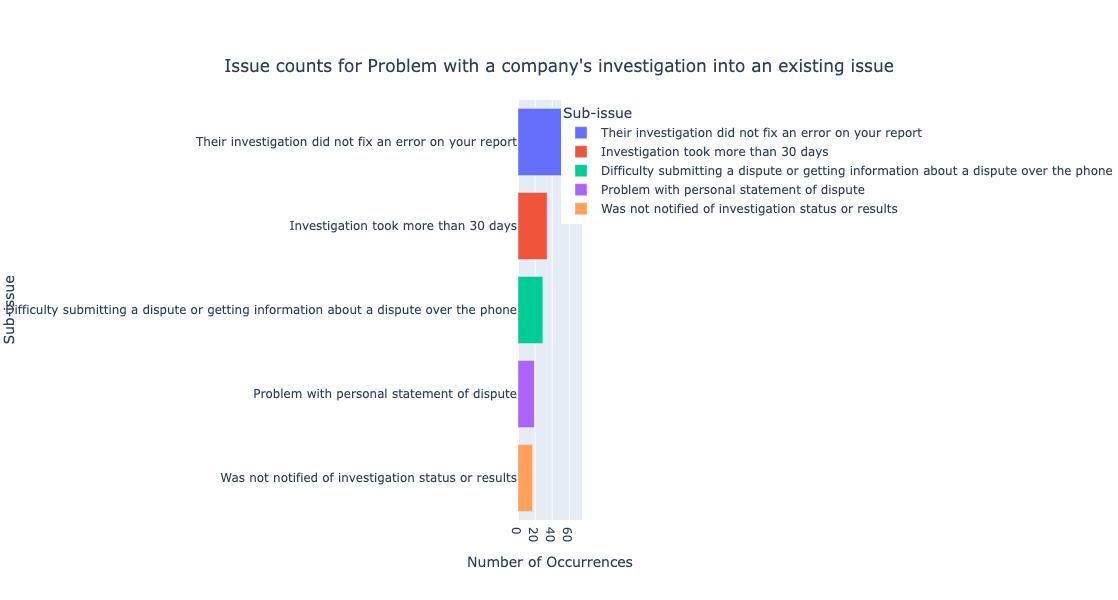

In [20]:
for i,issue in enumerate(issues_df['Issue'].value_counts().index):
    subissue = issues_df[issues_df['Issue'] == issue]
    subissue_counts = subissue['Sub-issue'].value_counts().reset_index()
    subissue_counts.columns = ['Sub-issue', 'Count']
    
    fig = px.bar(subissue_counts, y='Sub-issue', x='Count', color='Sub-issue',
                 title=f"Issue Count for {issue}",
                 width = 1400,
                 height = 600,
                 labels={'Count': 'Number of Occurrences'}, # Customizing axis labels
                 orientation='h') # Horizontal bars
    
    fig.update_layout(
        title={
            'text': f"Issue counts for {issue}",
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )
    
    fig.show()